In [11]:
#importation des packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb # visualization
import xgboost as xgb
from termcolor import colored as cl # text customization

from matplotlib import pyplot

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,learning_curve,validation_curve
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score # evaluation metric

#sb.set_style('whitegrid') # plot style
#plt.rcParams['figure.figsize'] = (20, 10) # plot size

from sklearn import linear_model
import mpl_toolkits
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

In [7]:
df = pd.read_excel('Temara_test_version_initial-changementQuartier.xlsx')
df

,Montant,Superficie,nearest_banque,nearest_train,nearest_restaurant,nearest_autoRoute,nearest_arretbus,nearest_superMarche,nearest_rocade,nearest_mosquee,nearest_pharmacie,nearest_routeNational,nearest_Ecole,nearest_hopital,nearest_plage,distane_plage,distane_zoneVilla,distace_HayRiad,nearest_bidonville,Quartier
0,420000.0,59,0.003001,0.038698,0.001106,0.036037,0.004485,0.032300,0.021768,0.001526,0.001428,0.021174,0.001106,0.004625,0.048246,2.92195,0.005122,0.027442,0.007313,3
1,500000.0,73,0.002998,0.038701,0.001107,0.036039,0.004486,0.032302,0.021768,0.001524,0.001430,0.021175,0.001108,0.004626,0.048248,2.92195,0.005122,0.027441,0.007310,3
2,480000.0,75,0.002996,0.038703,0.001109,0.036041,0.004487,0.032305,0.021768,0.001522,0.001432,0.021176,0.001109,0.004627,0.048251,2.92195,0.005122,0.027440,0.007308,3
3,400000.0,69,0.002993,0.038706,0.001111,0.036042,0.004488,0.032308,0.021767,0.001520,0.001434,0.021177,0.001111,0.004628,0.048253,2.92195,0.005122,0.027438,0.007306,3
4,300000.0,64,0.002990,0.038709,0.001113,0.036044,0.004489,0.032310,0.021767,0.001519,0.001436,0.021179,0.001113,0.004628,0.048255,2.92195,0.005122,0.027437,0.007304,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27897,700000.0,78,0.005096,0.020392,0.003208,0.028600,0.005024,0.014719,0.030431,0.001597,0.001503,0.010655,0.001580,0.006101,0.038220,2.80496,0.004718,0.040479,0.023737,1
27898,740000.0,78,0.005094,0.020395,0.003210,0.028603,0.005026,0.014722,0.030429,0.001598,0.001502,0.010657,0.001581,0.006103,0.038222,2.80496,0.004718,0.040478,0.023735,1
27899,819000.0,91,0.005091,0.020398,0.003212,0.028605,0.005028,0.014724,0.030428,0.001599,0.001500,0.010659,0.001581,0.006104,0.038223,2.80496,0.004718,0.040476,0.023732,1
27900,1035000.0,107,0.005088,0.020401,0.003214,0.028607,0.005030,0.014727,0.030427,0.001600,0.001498,0.010660,0.001581,0.006106,0.038225,2.80496,0.004718,0.040475,0.023729,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


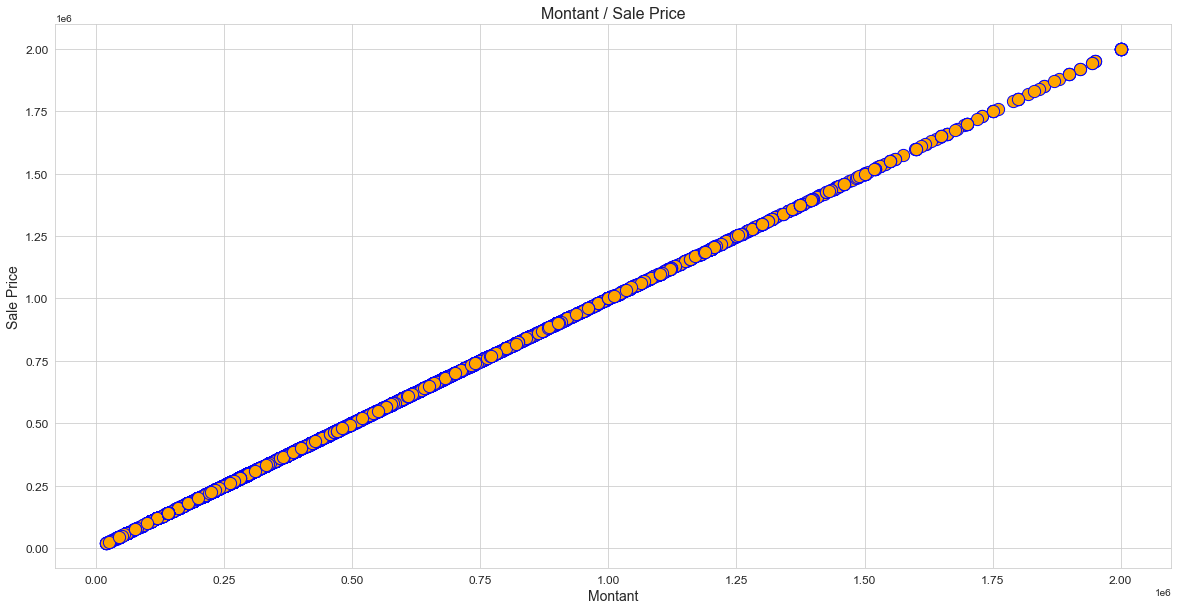

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


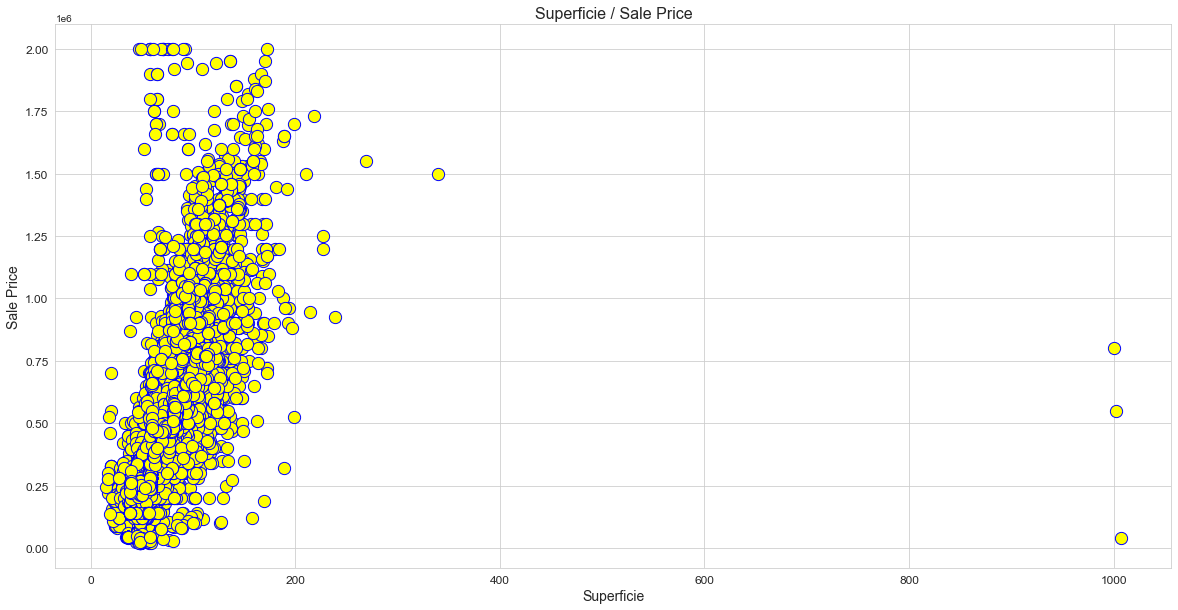

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


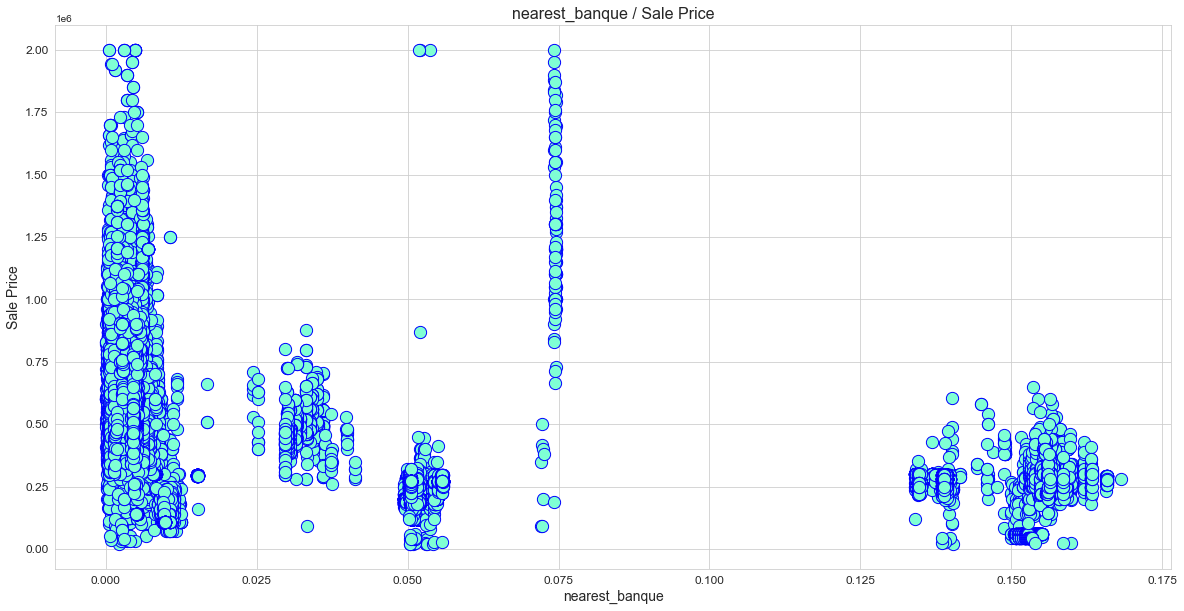

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


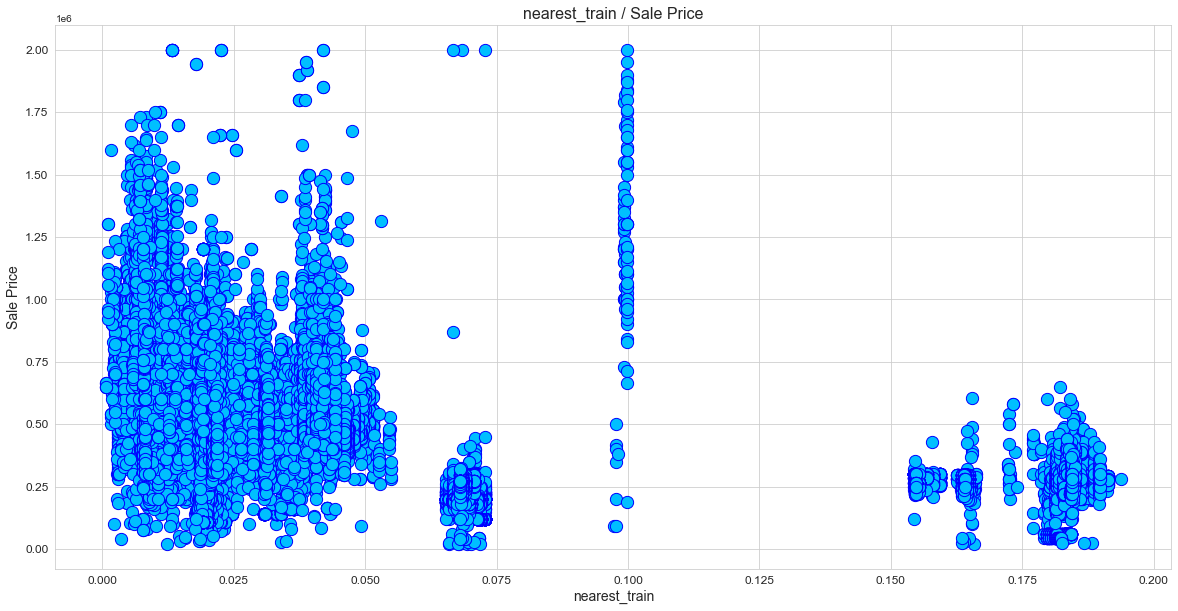

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


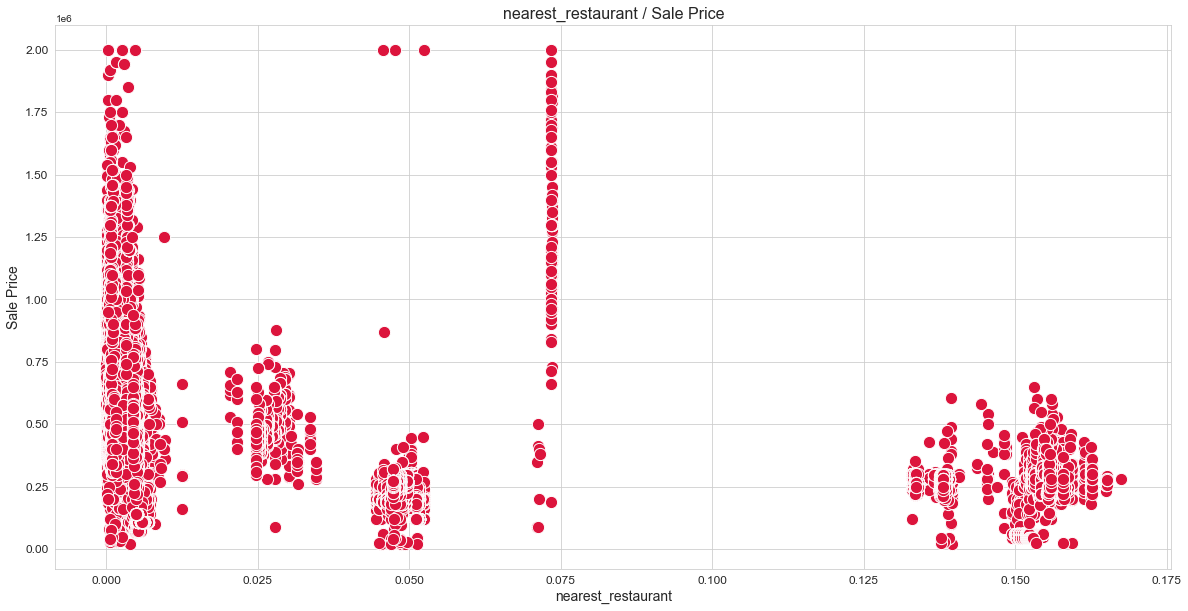

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


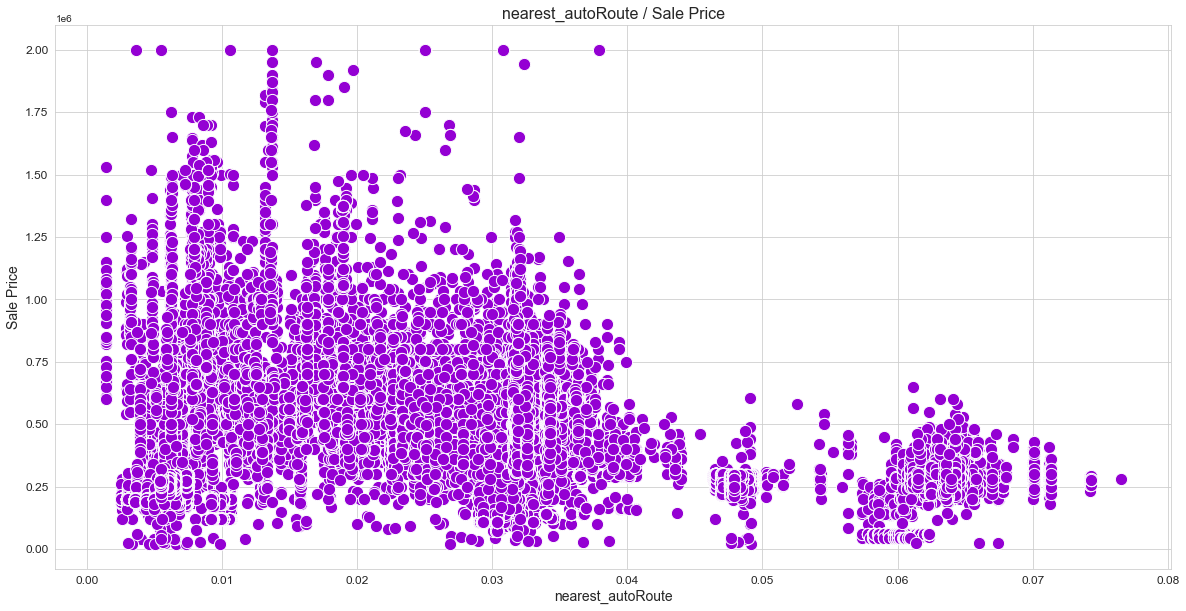

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


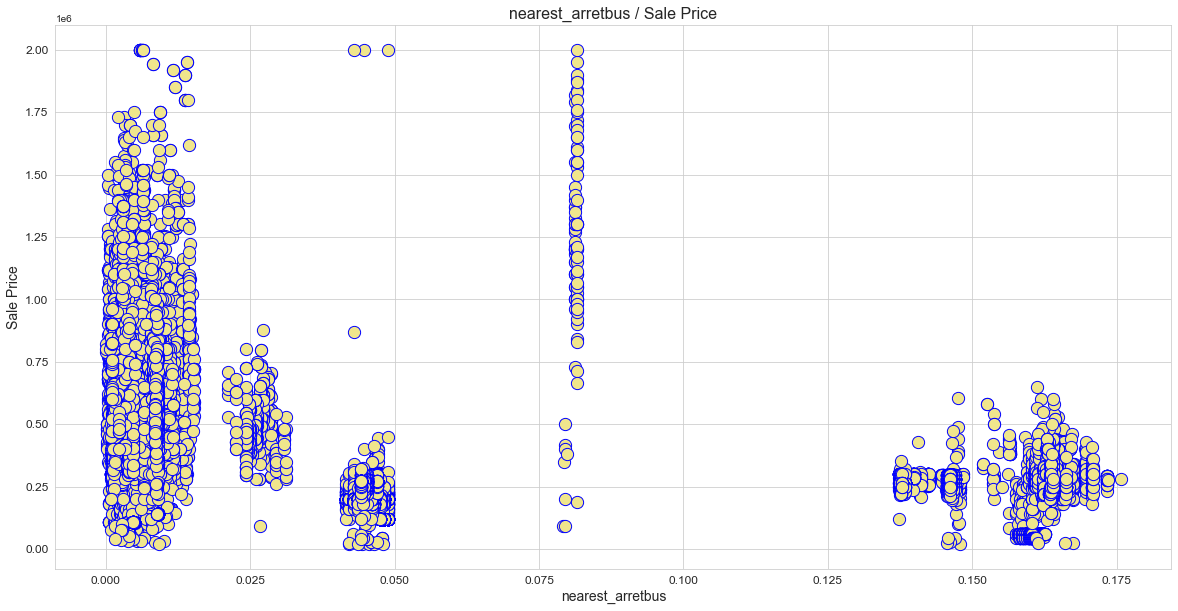

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


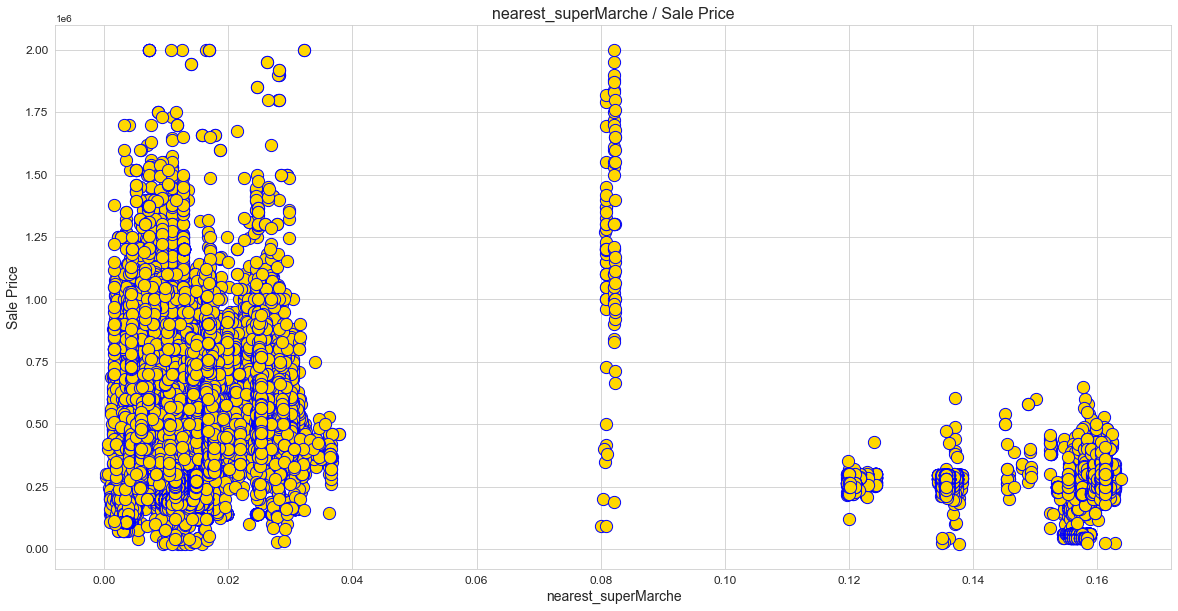

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


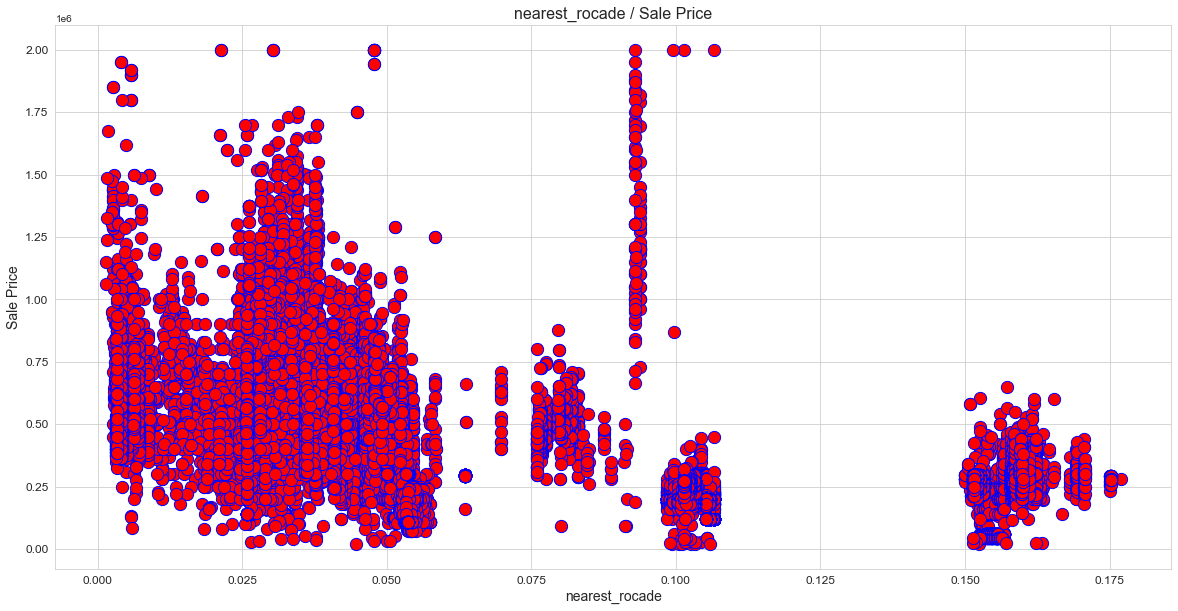

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


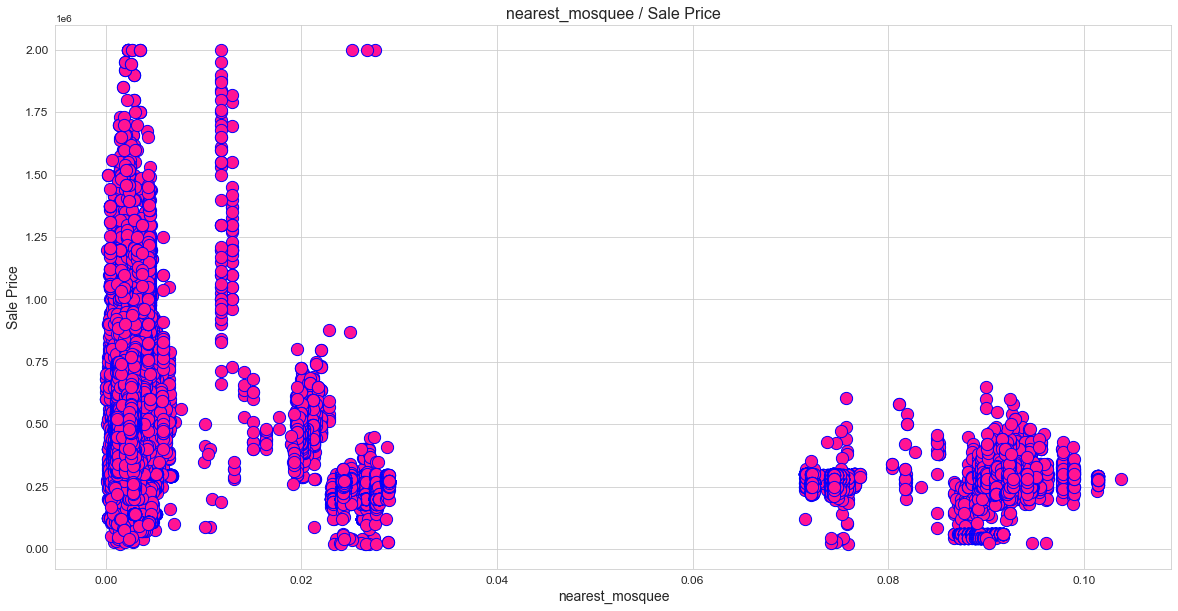

In [12]:
# 2. Scatter plot

def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / Sale Price'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sb.scatterplot(i[5], y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} / Sale Price'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
    plot7 = sb.scatterplot(i[6], y_var, data = df, color = 'khaki', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter7.png')
    plt.show()
    
    plot8 = sb.scatterplot(i[7], y_var, data = df, color = 'gold', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[7]), fontsize = 16)
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter8.png')
    plt.show()
    
    plot9 = sb.scatterplot(i[8], y_var, data = df, color = 'r', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[8]), fontsize = 16)
    plt.xlabel('{}'.format(i[8]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter9.png')
    plt.show()
    
    plot10 = sb.scatterplot(i[9], y_var, data = df, color = 'deeppink', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[9]), fontsize = 16)
    plt.xlabel('{}'.format(i[9]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter10.png')
    plt.show()
    
scatter_df('Montant')

In [2]:
Y = data['Montant']
X = data.drop(['Montant'],axis=1)
X

,Superficie,nearest_banque,nearest_train,nearest_restaux,nearest_autoRoute,nearest_arretbus,nearest_superMarche,nearest_rocade,nearest_mosquee,nearest_pharmacie,nearest_routeNational,nearest_Ecole,nearest_hopital,nearest_plage,distane_plage,distane_zoneVilla,distace_HayRiad,nearest_bidonville,Quartier
0,59,0.003001,0.038698,0.001106,0.036037,0.004485,0.032300,0.021768,0.001526,0.001428,0.021174,0.001106,0.004625,0.048246,2.92195,0.005122,0.027442,0.007313,3
1,73,0.002998,0.038701,0.001107,0.036039,0.004486,0.032302,0.021768,0.001524,0.001430,0.021175,0.001108,0.004626,0.048248,2.92195,0.005122,0.027441,0.007310,3
2,75,0.002996,0.038703,0.001109,0.036041,0.004487,0.032305,0.021768,0.001522,0.001432,0.021176,0.001109,0.004627,0.048251,2.92195,0.005122,0.027440,0.007308,3
3,69,0.002993,0.038706,0.001111,0.036042,0.004488,0.032308,0.021767,0.001520,0.001434,0.021177,0.001111,0.004628,0.048253,2.92195,0.005122,0.027438,0.007306,3
4,64,0.002990,0.038709,0.001113,0.036044,0.004489,0.032310,0.021767,0.001519,0.001436,0.021179,0.001113,0.004628,0.048255,2.92195,0.005122,0.027437,0.007304,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27897,78,0.005096,0.020392,0.003208,0.028600,0.005024,0.014719,0.030431,0.001597,0.001503,0.010655,0.001580,0.006101,0.038220,2.80496,0.004718,0.040479,0.023737,1
27898,78,0.005094,0.020395,0.003210,0.028603,0.005026,0.014722,0.030429,0.001598,0.001502,0.010657,0.001581,0.006103,0.038222,2.80496,0.004718,0.040478,0.023735,1
27899,91,0.005091,0.020398,0.003212,0.028605,0.005028,0.014724,0.030428,0.001599,0.001500,0.010659,0.001581,0.006104,0.038223,2.80496,0.004718,0.040476,0.023732,1
27900,107,0.005088,0.020401,0.003214,0.028607,0.005030,0.014727,0.030427,0.001600,0.001498,0.010660,0.001581,0.006106,0.038225,2.80496,0.004718,0.040475,0.023729,1


In [3]:
data.dropna(inplace = True)
print(cl(data.isnull().sum(), attrs = ['bold']))

Montant                  0
Superficie               0
nearest_banque           0
nearest_train            0
nearest_restaux          0
nearest_autoRoute        0
nearest_arretbus         0
nearest_superMarche      0
nearest_rocade           0
nearest_mosquee          0
nearest_pharmacie        0
nearest_routeNational    0
nearest_Ecole            0
nearest_hopital          0
nearest_plage            0
distane_plage            0
distane_zoneVilla        0
distace_HayRiad          0
nearest_bidonville       0
Quartier                 0
dtype: int64


In [4]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27897    False
27898    False
27899    False
27900    False
27901    False
Length: 27902, dtype: bool

In [5]:
#normalization de données
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
#Standarisation de données 
'''std = StandardScaler()
X_scale = std.fit_transform(X_scale)'''

'std = StandardScaler()\nX_scale = std.fit_transform(X_scale)'

In [6]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.2, random_state=0)
#data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [9]:
#creation du model
#colsample_bytree = 0.8, learning_rate = 0.2, max_depth = 3,n_estimators =100
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.4, learning_rate = 0.1, max_depth = 7,n_estimators =1000,min_child_weight= 1.1,gamma= 0.001,subsample= 0.9) #objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 10,n_estimators =65
svc = xg_reg.fit(x_train, y_train)

In [10]:
print('train score',svc.score(x_train,y_train))
print('test score',svc.score(x_test,y_test))

train score 0.9780012880670087
test score 0.8837001042990874


In [11]:
#test
pre=svc.predict(x_test)

In [14]:
print (r2_score(y_test,pre))

0.8837001042990874


In [15]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(y_test, pre)
error

42145.37950109748

In [16]:
pre

array([289766.1 , 597016.7 , 999181.4 , ..., 290862.78, 161459.89,
       544407.75], dtype=float32)

In [17]:
y_test.values

array([ 283373.37,  470000.  , 1254000.  , ...,  284057.48,  200000.  ,
        650000.  ])

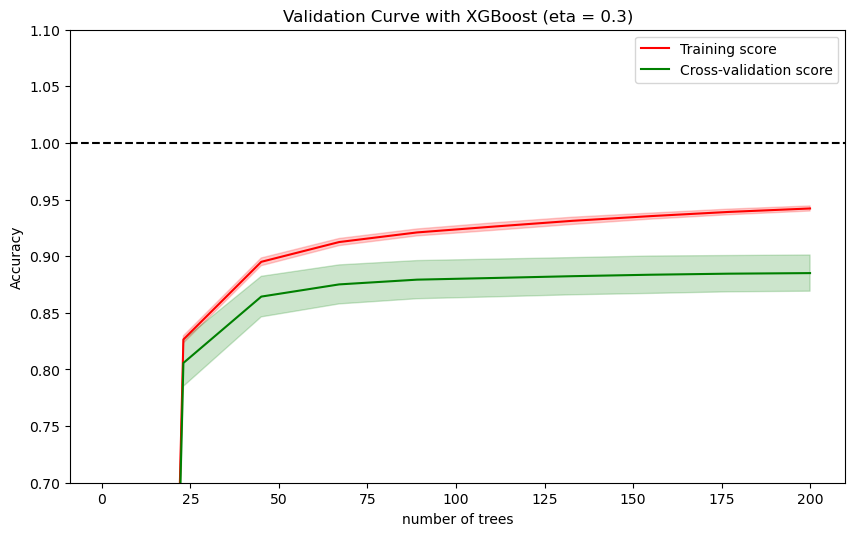

Best cross-validation result (0.89) obtained for 200 trees


In [31]:
n_estimators_range = np.linspace(1, 200, 10).astype('int')
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.4, learning_rate = 0.1, max_depth = 6,n_estimators =200,min_child_weight= 1.3,gamma= 0.003,subsample= 1) #objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 10,n_estimators =65

train_scores, test_scores = validation_curve(
    xg_reg,
    x_train, y_train,
    param_name = 'n_estimators',
    param_range = n_estimators_range,
    cv=5,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with XGBoost (eta = 0.3)")
plt.xlabel("number of trees")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.1)

plt.plot(n_estimators_range,
             train_scores_mean,
             label="Training score",
             color="r")

plt.plot(n_estimators_range,
             test_scores_mean,
             label="Cross-validation score",
             color="g")

plt.fill_between(n_estimators_range,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.2, color="r")

plt.fill_between(n_estimators_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2, color="g")

plt.axhline(y=1, color='k', ls='dashed')

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print("Best cross-validation result ({0:.2f}) obtained for {1} trees".format(test_scores_mean[i], n_estimators_range[i]))

En observant le graphique, nous pouvons tirer les conclusions suivantes:
le score d'apprentissage continue de croître en ajoutant de nouveaux arbres, mais à partir d'un certain point, le score du CV est fixe.
La variance est la plus faible, et le biais est élevé pour moins de 45 arbres,
à partir d'environ 45 arbres, la variance augmente et le biais du score CV reste stable (il n'y a pas d'intérêt à ajouter des arbres supplémentaires / de la complexité).
nous pouvons voir que le modèle est assez stable en maintenant la variance fixe lorsqu'on augmente sa complexité.
Nous pouvons supposer que le compromis pour notre modèle sera atteint à n_estimateurs = 50. La variance est encore trop importante.
